In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

####Load the data

In [4]:
df=pd.read_csv('/content/vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [7]:
text_data=df.drop(columns=['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)

text_data

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...
...,...
228202,45+ #URBAN #Bengaluru #CovidVaccine Availabili...
228203,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...
228204,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...
228205,They promote their Vaccines leaving out the st...


In [8]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    228207 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


#So now our data has 228207 entries

In [9]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = nltk.word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in set(stopwords.words('english'))]
    return " ".join(filtered_text)

In [10]:

text_data.text=text_data['text'].apply(data_processing)
text_data=text_data.drop_duplicates('text')
text_data

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...
...,...
228202,45 urban bengaluru covidvaccine availability 1...
228203,1844 bbmp bengaluru covidvaccine availability ...
228204,1844 urban bengaluru covidvaccine availability...
228205,promote vaccines leaving stronger russia vacci...


In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatize(data):
    text = [lemmatizer.lemmatize(word) for word in data]
    return data

In [13]:
nltk.download('wordnet')
text_data['text'] = text_data['text'].apply(lambda x: lemmatize(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-13-bf80966ba7ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'] = text_data['text'].apply(lambda x: lemmatize(x))


In [14]:
text_data

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...
...,...
228202,45 urban bengaluru covidvaccine availability 1...
228203,1844 bbmp bengaluru covidvaccine availability ...
228204,1844 urban bengaluru covidvaccine availability...
228205,promote vaccines leaving stronger russia vacci...


In [15]:
from textblob import TextBlob

def polarity(text):
  return TextBlob(text).sentiment.polarity

In [16]:
text_data['polarity']=text_data['text'].apply(polarity)
text_data

<ipython-input-16-cd4c37026ffc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['polarity']=text_data['text'].apply(polarity)


,text,polarity
0,folks said daikon paste could treat cytokine s...,0.0
1,world wrong side history year hopefully bigges...,-0.5
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0
3,facts immutable senator even youre ethically s...,0.1
4,explain need vaccine borisjohnson matthancock ...,0.0
...,...,...
228202,45 urban bengaluru covidvaccine availability 1...,0.2
228203,1844 bbmp bengaluru covidvaccine availability ...,0.4
228204,1844 urban bengaluru covidvaccine availability...,0.2
228205,promote vaccines leaving stronger russia vacci...,0.0


In [17]:
def sentiment(label):
  if label<0:
    return 'negative'
  elif label==0:
    return 'Neutral'

  else:
    return 'Positive'

In [18]:
text_data['Label']=text_data['polarity'].apply(sentiment)
text_data

<ipython-input-18-16382e58a5aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['Label']=text_data['polarity'].apply(sentiment)


,text,polarity,Label
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral
...,...,...,...
228202,45 urban bengaluru covidvaccine availability 1...,0.2,Positive
228203,1844 bbmp bengaluru covidvaccine availability ...,0.4,Positive
228204,1844 urban bengaluru covidvaccine availability...,0.2,Positive
228205,promote vaccines leaving stronger russia vacci...,0.0,Neutral


###Plots

<Axes: xlabel='Label', ylabel='count'>

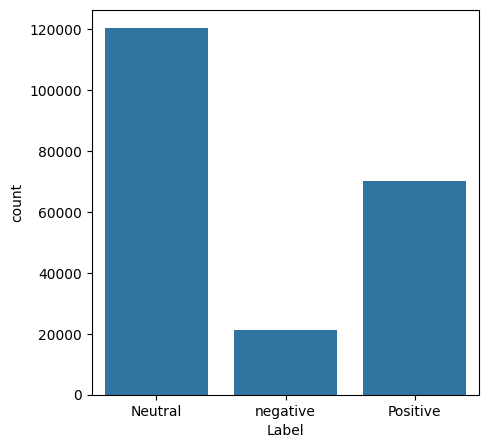

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Label', data = text_data)

###Get Positive tweets

In [25]:
t=text_data[text_data['Label']=='Positive']
t

,text,polarity,Label
3,facts immutable senator even youre ethically s...,0.100,Positive
5,anyone useful adviceguidance whether covid vac...,0.400,Positive
7,many bright days 2020 best 1 bidenharris winni...,0.675,Positive
10,deaths closing 300000 mark millions people wai...,0.250,Positive
11,cnnbrk covid19 covidvaccine vaccine corona pfi...,1.000,Positive
...,...,...,...
228201,1844 urban bengaluru covidvaccine availability...,0.200,Positive
228202,45 urban bengaluru covidvaccine availability 1...,0.200,Positive
228203,1844 bbmp bengaluru covidvaccine availability ...,0.400,Positive
228204,1844 urban bengaluru covidvaccine availability...,0.200,Positive


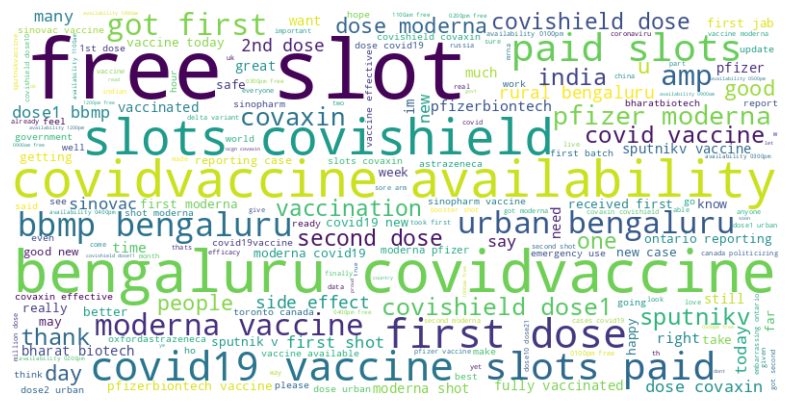

In [32]:
from wordcloud import WordCloud,STOPWORDS

text=' '.join([word for word in t['text']])

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


###Get Negative tweets

In [30]:
n=text_data[text_data['Label']=='negative']
n

,text,polarity,Label
1,world wrong side history year hopefully bigges...,-0.500000,negative
6,bit sad claim fame success vaccination patriot...,-0.100000,negative
18,pfizer rake billions expensive covidvaccine al...,-0.500000,negative
19,trump administration failed deliver vaccine pr...,-0.500000,negative
26,wear mask wash hands remain socially distant p...,-0.050000,negative
...,...,...,...
228074,mohfw_india ho pmoindia drreddys narrow escape...,-0.200000,negative
228079,vaccine discrimination latin americans immuniz...,-0.071429,negative
228088,taking care mental health covid19 covid share ...,-0.100000,negative
228131,sorry putin russians dont want crappy sputnikv...,-0.500000,negative


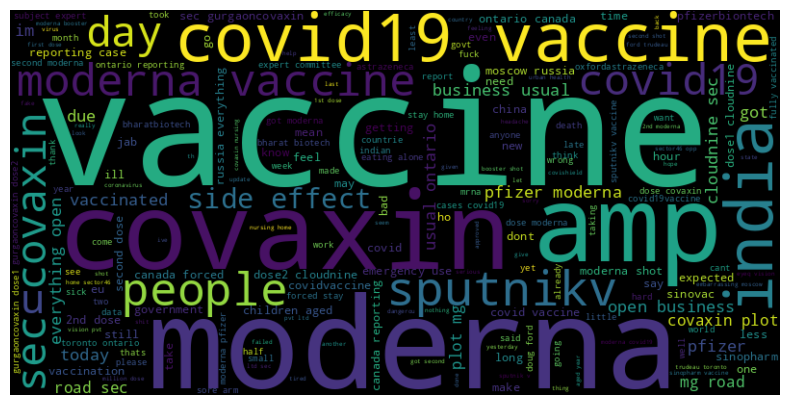

In [34]:
n_text=' '.join([word for word in n['text']])

w=WordCloud(stopwords=STOPWORDS,background_color='Black',width=800,height=400).generate(n_text)

plt.figure(figsize=(10,5))
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.show()

###Neutral Tweets

In [35]:
nn=text_data[text_data['Label']=='Neutral']
nn

,text,polarity,Label
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral
8,covid vaccine getting covidvaccine covid19 pfi...,0.0,Neutral
9,covidvaccine states start getting covid19vacci...,0.0,Neutral
...,...,...,...
228188,apuwall ho drtedros need dates sputnikv,0.0,Neutral
228189,tourists inoculated covid19 russian sputnikv v...,0.0,Neutral
228193,explore locality like never localwaala covid s...,0.0,Neutral
228195,israel delays entry tourists vaccinated russia...,0.0,Neutral


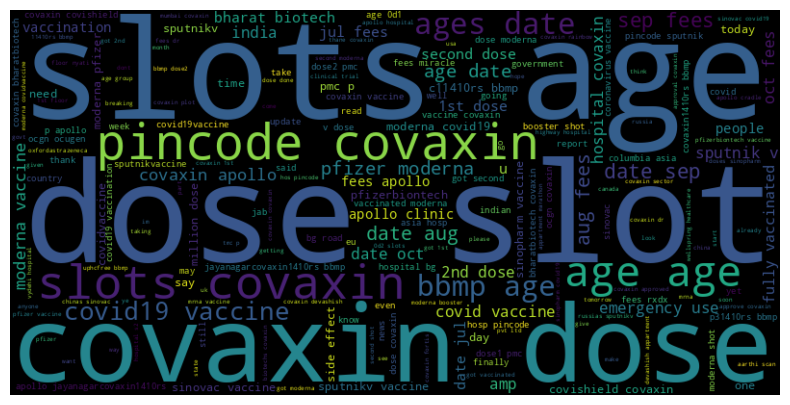

In [36]:
nn_text=' '.join([word for word in nn['text']])

w1=WordCloud(stopwords=STOPWORDS,background_color='Black',width=800,height=400).generate(nn_text)
plt.figure(figsize=(10,5))
plt.imshow(w1,interpolation='bilinear')
plt.axis('off')
plt.show()


#Perform count vectorizer technique now. It converts a collection of text data into set of tokens.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2)).fit(text_data['text'])
feature_names = vect.get_feature_names_out()
print(feature_names)


['00' '00 doses' '000' ... '𝟸𝟻𝟺𝟾 𝚍𝚘𝚜𝚎𝚜' '𝟿𝟶𝟿' '𝟿𝟶𝟿 𝚘𝚏']


In [44]:
X=text_data['text']
Y=text_data['Label']
X=vect.transform(X)

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import pandas as pd

# Assuming X_train, X_test, Y_train, Y_test are already defined
l = LogisticRegression()
l.fit(X_train, Y_train)
y_pred = l.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
r = recall_score(Y_test, y_pred, average='macro')
f = f1_score(Y_test, y_pred, average='macro')
p = precision_score(Y_test, y_pred, average='macro')

data = {'Accuracy': [acc], 'Precision': [p], 'Recall': [r], 'F1_Score': [f]}
dt = pd.DataFrame(data)
dt


,Accuracy,Precision,Recall,F1_Score
0,0.964994,0.962622,0.923755,0.941423
